In [ ]:
pip install keras


In [ ]:
pip install tensorflow


#https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/international-airline-passengers.csv',parse_dates = ['Month'],index_col='Month')

In [ ]:
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


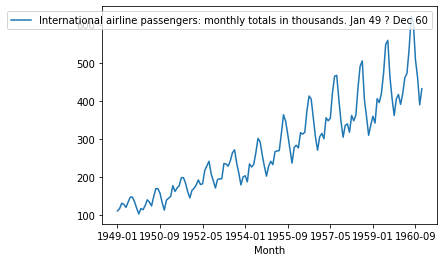

In [ ]:
df.plot()

In [ ]:
size = int(df.shape[0] * 0.8)
size

116

In [ ]:
train = df.iloc[:size]
train.shape

(116, 1)

In [ ]:
test = df[size:]
test.shape

(29, 1)

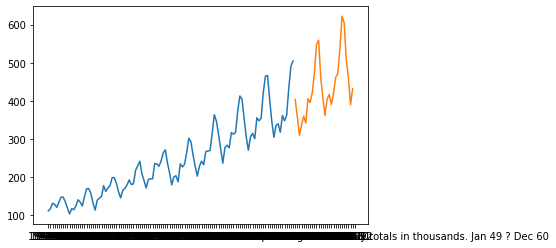

In [ ]:

plt.plot(train)
plt.plot(test)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
max  = MinMaxScaler()
max.fit(train)
sc_train = max.transform(train)
sc_test = max.transform(test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
lstm_model = Sequential()
# lstm = LSTM()
lstm_model.add(LSTM(200,input_shape =(29,1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse')
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
gen = TimeseriesGenerator(sc_train,sc_train,length = 29,batch_size = 1)
gen